# Sorted firing rates

author: steeve.laquitaine@epfl.ch    
date: 17.01.2023  
last modified: 25.07.2024

* Maximal duration recordings (full except for the evoked condition due to HPU memory limitations)

### Prerequisites:

- processing: engineer recordings, fits noise and amplification, wires probe, records metadata, preprocesses, writes
- sorting: sorts and records metadata to SortingExtractors

### Setup

Activate `spikeinterf..` python3.9 virtual environment (select interpreter - find envs/ path - add kernel)

In [9]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import spikeinterface as si

# SET PROJECT PATH

PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config
from src.nodes.postpro import spikestats
from src.nodes.validation import firing_rate as fr

# SETUP EXPERIMENTS

# data [done]
cfg_nv, _ = get_config("vivo_marques", "c26").values()
PREP_PATH_nv = cfg_nv["preprocessing"]["output"]["trace_file_path"]
SORTED_PATH_nv = cfg_nv["sorting"]["sorters"]["kilosort4"]["output"]

# model biophy. spontaneous [done]
cfg_ns, _ = get_config("silico_neuropixels", "concatenated").values()
PREP_PATH_ns = cfg_ns["preprocessing"]["output"]["full"]["trace_file_path_gain_fitd_adj10perc_less_noise_fitd_int16"]
SORTED_PATH_ns = cfg_ns["sorting"]["sorters"]["kilosort4"]["output"]

# model biophy. evoked (40m) - RUNNING
# data_conf_sili_ev, param_conf_sili_ev = get_config("silico_neuropixels", "stimulus").values()
# PREP_PATH_sili_ev = data_conf_sili_ev["preprocessing"]["output"]["full"]["trace_file_path_gain_fitd_adj10perc_less_noise_fitd_int16"]
# SORTED_PATH_sili_ev = data_conf_sili_ev["sorting"]["sorters"]["kilosort4"]["output"]

# Buccino with best fitted gain for layer 5 [done]
cfg, _ = get_config("buccino_2020", "2020").values()
PREP_PATH_nb = cfg["preprocessing"]["output"]["trace_file_path_gain_ftd"]
SORTED_PATH_nb = cfg["sorting"]["sorters"]["kilosort4"]["output"]


# SETUP WAVEFORMS
MS_BEFORE = 3
MS_AFTER = 3

# SETUP PLOT 

# set lognormal plot parameters
log_x_min = -5
log_x_max = 3.0
nbins = 20

# IF you don't want to use the feature, set the value to 1E100
# t_dec = 3600 # seconds until experimenter decides a cell is silent
t_dec = 1^100 # seconds until experimenter decides a cell is silent

# experiment colors
cl = dict()
cl["COLOR_NV"] = [0.6, 0.6, 0.6]
cl["COLOR_NS"] = [0.9, 0.14, 0.15]
cl["COLOR_NB"] = [0.22, 0.5, 0.72] # blue
cl["COLOR_NE"] = [1, 0.49, 0] # orange
cl["COLOR_HV"] = "k" # black
cl["COLOR_HS"] = np.array([26, 152, 80]) / 255 # green

# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5 # typically between 0.5 and 1
plt.rcParams["axes.linewidth"] = 0.5 #1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5 #0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent":True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.5}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False              # no legend frame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-07-26 10:53:06,462 - root - utils.py - get_config - INFO - Reading experiment config.
2024-07-26 10:53:06,496 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-07-26 10:53:06,497 - root - utils.py - get_config - INFO - Reading experiment config.
2024-07-26 10:53:06,574 - root - utils.py - get_config - INFO - Reading experiment config. - done


2024-07-26 10:53:06,575 - root - utils.py - get_config - INFO - Reading experiment config.
2024-07-26 10:53:06,600 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Population

#### Compute

In [32]:
df_nv = fr.get_vivo_sorted_unit_metadata(SORTED_PATH_nv)
df_ns = fr.get_biophy_sorting_metadata(SORTED_PATH_ns)
# df_ne = fr.get_biophy_sorting_metadata(SORTED_PATH_sili_ev)
df_nb = fr.get_synth_sorting_metadata(SORTED_PATH_nb)

In [30]:
# unit-test: check all in cortex
assert all(
    np.isin(np.sort(df_ns["layer"].unique()), ["L1", "L2", "L3", "L4", "L5", "L6"])
), "nor all in cortex"

### Apply quality filters

- evidence that false positives are low amplitude sorted spikes
- evidence that L1 silico best matches L1 vivo when selecting higher amplitude spikes
- evidence that other layers best match when selecting all spikes

In [5]:
FIGSIZE = (1, 1)

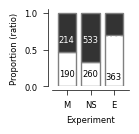

In [16]:
# plot
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax = fr.plot_single_unit_ratio(ax, df_nv, df_ns, df_nb, legend_cfg)

# axes
ax.spines[["top", "right"]].set_visible(False)
ax.legend("", frameon=False)

# disconnect axes (R style)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))

# # save figures
# plt.savefig(
#     "figures/0_validation/6_firing_rate/svg/marques/marques_single_unit_ratio.svg",
#     **savefig_cfg,
# )

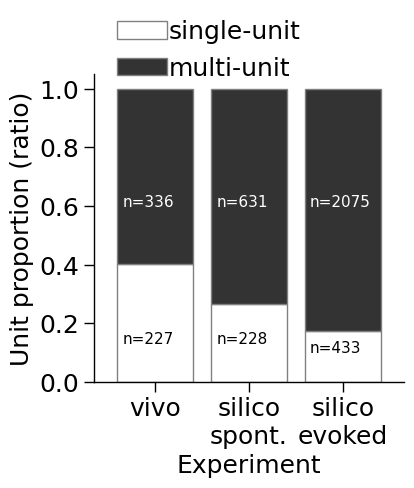

In [8]:
# plot
# TODO: represent only units in cortex! that will make the number in this figure
# and the next match.
# fig, axis = fr.plot_single_unit_ratio(df_vivo, df_silico_sp, df_silico_ev)

# # save figures
# plt.savefig(
#     "figures/0_validation/6_firing_rate/svg/marques/marques_single_unit_ratio.svg",
#     **savefig_cfg,
# )

In [33]:
# df_vivo = df_vivo[df_vivo["kslabel"] == "good"]
# df_silico_sp = df_silico_sp[df_silico_sp["kslabel"] == "good"]
# df_silico_ev = df_silico_ev[df_silico_ev["kslabel"] == "good"]
print(df_nv.shape[0])
print(df_ns.shape[0])
# print(df_ne.shape[0])
print(df_nb.shape[0])

404
793
518


#### Plot

/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-package

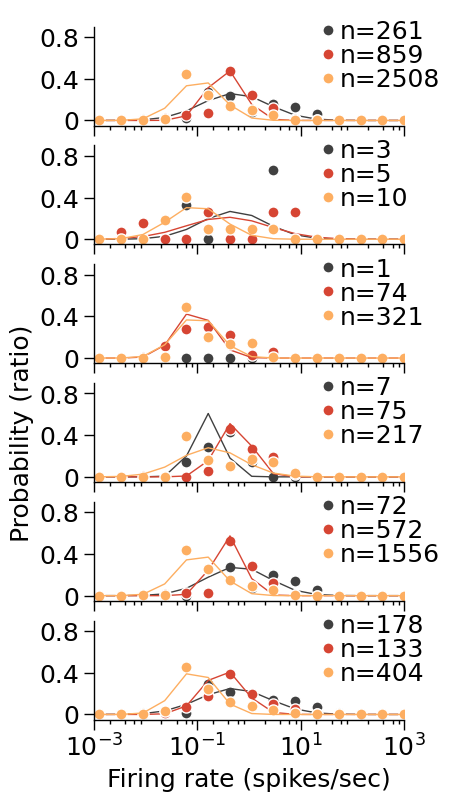

In [32]:
MARKERSIZE = 8
Y_MAX = 0.9
X_MIN = 1e-3
X_MAX = 1e3
layers = ["L1", "L2/3", "L4", "L5", "L6"]

fig, axes = plt.subplots(len(layers) + 1, 1, figsize=(4, 9))

# vivo
y = df_vivo["firing_rate"][df_vivo["layer"].isin(layers)].values.astype(np.float32)
out_vivo_entire = spikestats.plot_firing_rate_hist_vs_lognorm(
    y,
    log_x_min,
    log_x_max,
    nbins,
    t_dec,
    axes[0],
    label=f"n={len(y)}",
    color=COLOR_VIVO,
    markerfacecolor=COLOR_VIVO,
    markersize=MARKERSIZE,
    legend=False,
    lognormal=True,
)

# silico spontaneous
y = df_silico_sp["firing_rate"][df_silico_sp["layer"].isin(layers)].values.astype(
    np.float32
)
out_silico_entire_spont = spikestats.plot_firing_rate_hist_vs_lognorm(
    y,
    log_x_min,
    log_x_max,
    nbins,
    t_dec,
    axes[0],
    label=f"n={len(y)}",
    color=COLOR_SILI,
    markerfacecolor=COLOR_SILI,
    markersize=MARKERSIZE,
    legend=False,
    lognormal=True,
)
axes[0].set_xticklabels([])
axes[0].set_ylim([-0.05, Y_MAX])
axes[0].set_xlim([X_MIN, X_MAX])
axes[0].tick_params(axis="y")
axes[0].legend(
    frameon=False,
    bbox_to_anchor=(0.6, 0.4),
    handletextpad=-0.5,
    labelspacing=0,
)

# silico evoked
y = df_silico_ev["firing_rate"][df_silico_ev["layer"].isin(layers)].values.astype(
    np.float32
)
out_silico_entire_ev = spikestats.plot_firing_rate_hist_vs_lognorm(
    y,
    log_x_min,
    log_x_max,
    nbins,
    t_dec,
    axes[0],
    label=f"n={len(y)}",
    color=COLOR_STIM,
    markerfacecolor=COLOR_STIM,
    markersize=MARKERSIZE,
    legend=False,
    lognormal=True,
)
axes[0].set_xticklabels([])
axes[0].set_ylim([-0.05, Y_MAX])
axes[0].set_xlim([X_MIN, X_MAX])
axes[0].tick_params(axis="y")
axes[0].legend(
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0.6, 1.3),
    handletextpad=-0.5,
    labelspacing=0,
)

out_vivo_all = []
out_sili_spont_all = []
out_sili_ev_all = []


### By LAYER **********************************************

for ix in range(len(layers)):
    # vivo
    y = df_vivo["firing_rate"][df_vivo["layer"] == layers[ix]].values.astype(np.float32)
    out_vivo_all.append(
        spikestats.plot_firing_rate_hist_vs_lognorm(
            y,
            log_x_min,
            log_x_max,
            nbins,
            t_dec,
            axes[ix + 1],
            label=f"n={len(y)}",
            color=COLOR_VIVO,
            markerfacecolor=COLOR_VIVO,
            markersize=MARKERSIZE,
            legend=False,
            lognormal=True,
        )
    )

    # silico spont
    y = df_silico_sp["firing_rate"][df_silico_sp["layer"] == layers[ix]].values.astype(
        np.float32
    )
    out_sili_spont_all.append(
        spikestats.plot_firing_rate_hist_vs_lognorm(
            y,
            log_x_min,
            log_x_max,
            nbins,
            t_dec,
            axes[ix + 1],
            label=f"n={len(y)}",
            color=COLOR_SILI,
            markerfacecolor=COLOR_SILI,
            markersize=MARKERSIZE,
            legend=False,
            lognormal=True,
        )
    )
    axes[ix + 1].set_ylim([-0.05, Y_MAX])
    axes[ix + 1].set_xlim([X_MIN, X_MAX])

    # silico evoked
    y = df_silico_ev["firing_rate"][df_silico_ev["layer"] == layers[ix]].values.astype(
        np.float32
    )
    out_sili_ev_all.append(
        spikestats.plot_firing_rate_hist_vs_lognorm(
            y,
            log_x_min,
            log_x_max,
            nbins,
            t_dec,
            axes[ix + 1],
            label=f"n={len(y)}",
            color=COLOR_STIM,
            markerfacecolor=COLOR_STIM,
            markersize=MARKERSIZE,
            legend=False,
            lognormal=True,
        )
    )
    axes[ix + 1].set_ylim([-0.05, Y_MAX])
    axes[ix + 1].set_xlim([X_MIN, X_MAX])
    axes[ix + 1].legend(
        frameon=False,
        loc="upper left",
        bbox_to_anchor=(0.6, 1.3),
        handletextpad=-0.5,
        labelspacing=0,
    )
    if ix == 2:
        axes[ix + 1].set_ylabel("Probability (ratio)")
    if ix == 4:
        axes[ix + 1].set_xlabel("Firing rate (spikes/sec)")
    else:
        axes[ix + 1].set_xticklabels([])

# save fig
plt.savefig(
    "figures/2_realism/6_firing_rate/svg/marques/marques_sorted_fr_by_layer.svg",
    **savefig_cfg,
)

In [26]:
# sanity check single units
assert 0 + 1 + 3 + 82 + 23 == 109
assert 1 + 3 + 32 + 147 + 45 == 228
assert 2 + 38 + 43 + 235 + 115 == 433

### Sorted firing stats per layer and condition

In [65]:
# Stats
print(df_silico_sp["firing_rate"].astype(float)[df_silico_sp["layer"] == "L1"].mean())
print(df_silico_ev["firing_rate"].astype(float)[df_silico_ev["layer"] == "L1"].mean())

print(df_silico_sp["firing_rate"].astype(float)[df_silico_sp["layer"] == "L2/3"].mean())
print(df_silico_ev["firing_rate"].astype(float)[df_silico_ev["layer"] == "L2/3"].mean())

print(df_silico_sp["firing_rate"].astype(float)[df_silico_sp["layer"] == "L4"].mean())
print(df_silico_ev["firing_rate"].astype(float)[df_silico_ev["layer"] == "L4"].mean())

print(df_silico_sp["firing_rate"].astype(float)[df_silico_sp["layer"] == "L5"].mean())
print(df_silico_ev["firing_rate"].astype(float)[df_silico_ev["layer"] == "L5"].mean())

print(df_silico_sp["firing_rate"].astype(float)[df_silico_sp["layer"] == "L6"].mean())
print(df_silico_ev["firing_rate"].astype(float)[df_silico_ev["layer"] == "L6"].mean())

1.2853748221881687
0.310447914712131
0.19973810607366063
0.19854872003799692
0.8134698012719551
0.5491261241967201
0.5654497200882036
0.2606180983232388
0.6307864735407153
0.2349201280238697


[TODO]: 
- replace std by 95% confidence intervals
- make sure that the means are correct
- run statistical tests

### Stats over the mean

/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-package

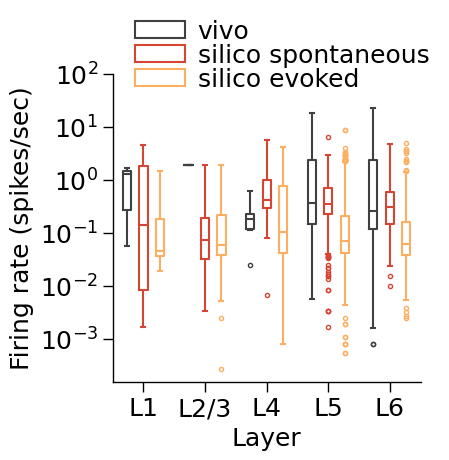

In [66]:
import copy
import seaborn as sns

# concat firing rates by layer
fr_vivo = []
fr_sili_sp = []
fr_sili_ev = []
layer_vivo = []
layer_sili_sp = []
layer_sili_ev = []
for ix, layer in enumerate(layers):
    # vivo
    fr_vivo_i = (
        df_vivo["firing_rate"][df_vivo["layer"] == layer]
        .values.astype(np.float32)
        .tolist()
    )
    fr_vivo += fr_vivo_i
    layer_vivo += [layer] * len(fr_vivo_i)

    # silico spontaneois
    fr_sili_sp_i = (
        df_silico_sp["firing_rate"][df_silico_sp["layer"] == layer]
        .values.astype(np.float32)
        .tolist()
    )
    fr_sili_sp += fr_sili_sp_i
    layer_sili_sp += [layer] * len(fr_sili_sp_i)

    # silico evoked
    fr_sili_ev_i = (
        df_silico_ev["firing_rate"][df_silico_ev["layer"] == layer]
        .values.astype(np.float32)
        .tolist()
    )
    fr_sili_ev += fr_sili_ev_i
    layer_sili_ev += [layer] * len(fr_sili_ev_i)


vivo_data = pd.DataFrame(data=np.array(fr_vivo), columns=["firing rate"])
vivo_data["experiment"] = "vivo"
vivo_data["layer"] = layer_vivo
sili_data_sp = pd.DataFrame(data=np.array(fr_sili_sp), columns=["firing rate"])
sili_data_sp["experiment"] = "silico spontaneous"
sili_data_sp["layer"] = layer_sili_sp
sili_data_ev = pd.DataFrame(data=np.array(fr_sili_ev), columns=["firing rate"])
sili_data_ev["experiment"] = "silico evoked"
sili_data_ev["layer"] = layer_sili_ev

plot_data = pd.concat([vivo_data, sili_data_sp, sili_data_ev], ignore_index=True)

# drop sites outside layers
mask = np.isin(plot_data["layer"], layers)
plot_data = plot_data[mask]
plot_data = plot_data.sort_values(by=["layer"])

# we plot the stats over log10(firing rate) which reflects
# bestwhat we see from the distribution plots (stats over raw data
# is not visible). Note: the log of the median is the median of the log
fig, ax = plt.subplots(1, figsize=FIG_SIZE)

plot_data2 = copy.copy(plot_data)
plot_data2["firing rate"] = np.log10(plot_data2["firing rate"])

ax = sns.boxplot(
    ax=ax,
    data=plot_data2,
    x="layer",
    y="firing rate",
    hue="experiment",
    fill=False,
    hue_order=["vivo", "silico spontaneous", "silico evoked"],
    palette=[COLOR_VIVO, COLOR_SILI, COLOR_STIM],
    gap=0.5,
    flierprops={"marker": "."},
    linewidth=1.5,
)
ax.set_yticks(np.arange(-3, 3))
yticklabels = ["$10^{" + str(ix) + "}$" for ix in np.arange(-3, 3)]
ax.set_yticklabels(yticklabels)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0, 1.25),
    handletextpad=0.5,
    labelspacing=0,
)
ax.set_ylabel("Firing rate (spikes/sec)")
ax.set_xlabel("Layer")
ax.set_box_aspect(BOX_ASPECT)  # square axis

# save figures
plt.savefig(
    "figures/2_realism/6_firing_rate/pdf/marques/marques_sorted_fr_stats.pdf",
    bbox_inches="tight",
)
plt.savefig(
    "figures/2_realism/6_firing_rate/svg/marques/marques_sorted_fr_stats.svg",
    bbox_inches="tight",
)

### Stats over std

/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-package

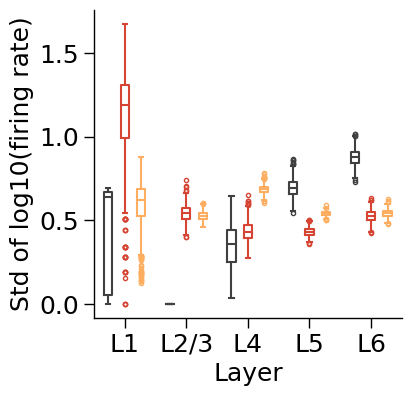

In [67]:
N_BOOT = 1000

# concat firing rates by layer
log_fr_stds_vivo = []
log_fr_stds_sili_sp = []
log_fr_stds_sili_ev = []
layer_vivo = []
layer_sili_sp = []
layer_sili_ev = []
for ix, layer in enumerate(layers):
    # vivo
    log_fr_stds_i = bootstrap_log_fr_std(
        df_vivo["firing_rate"][df_vivo["layer"] == layer].astype(np.float32).tolist(),
        N_BOOT,
    )
    log_fr_stds_vivo += log_fr_stds_i
    layer_vivo += [layer] * len(log_fr_stds_i)

    # silico spontaneous
    log_fr_stds_sp_i = bootstrap_log_fr_std(
        df_silico_sp["firing_rate"][df_silico_sp["layer"] == layer]
        .astype(np.float32)
        .tolist(),
        N_BOOT,
    )
    log_fr_stds_sili_sp += log_fr_stds_sp_i
    layer_sili_sp += [layer] * len(log_fr_stds_sp_i)

    # silico evoked
    log_fr_stds_ev_i = bootstrap_log_fr_std(
        df_silico_ev["firing_rate"][df_silico_ev["layer"] == layer]
        .astype(np.float32)
        .tolist(),
        N_BOOT,
    )
    log_fr_stds_sili_ev += log_fr_stds_ev_i
    layer_sili_ev += [layer] * len(log_fr_stds_ev_i)


# Format dataset to plot
vivo_data = pd.DataFrame(
    data=np.array(log_fr_stds_vivo), columns=["std of log10(firing rate)"]
)
vivo_data["experiment"] = "vivo"
vivo_data["layer"] = layer_vivo

sili_data_sp = pd.DataFrame(
    data=np.array(log_fr_stds_sili_sp), columns=["std of log10(firing rate)"]
)
sili_data_sp["experiment"] = "silico spontaneous"
sili_data_sp["layer"] = layer_sili_sp

sili_data_ev = pd.DataFrame(
    data=np.array(log_fr_stds_sili_ev), columns=["std of log10(firing rate)"]
)
sili_data_ev["experiment"] = "silico evoked"
sili_data_ev["layer"] = layer_sili_ev


plot_data = pd.concat([vivo_data, sili_data_sp, sili_data_ev], ignore_index=True)

# drop sites outside layers
mask = np.isin(plot_data["layer"], layers)
plot_data = plot_data[mask]
plot_data = plot_data.sort_values(by=["layer"])


# we plot stds stats over bootstrapped log10(firing rate) which reflects
# best what we see from the distribution plots (stats over raw data
# is not visible).
fig, ax = plt.subplots(1, figsize=FIG_SIZE)

ax = sns.boxplot(
    ax=ax,
    data=plot_data,
    x="layer",
    y="std of log10(firing rate)",
    hue="experiment",
    fill=False,
    hue_order=["vivo", "silico spontaneous", "silico evoked"],
    palette=[COLOR_VIVO, COLOR_SILI, COLOR_STIM],
    gap=0.5,
    flierprops={"marker": "."},
    linewidth=1.5,
)

# add legend
ax.spines[["top", "right"]].set_visible(False)
# ax.legend(
#     frameon=False,
#     loc="upper left",
#     bbox_to_anchor=(0.2, 1.1),
#     handletextpad=0.5,
#     labelspacing=0,
# )
plt.legend([], [], frameon=False)
ax.set_ylabel("Std of log10(firing rate)")
ax.set_xlabel("Layer")
ax.set_box_aspect(BOX_ASPECT)  # square axis

# save figures
plt.savefig(
    "figures/2_realism/6_firing_rate/pdf/marques/marques_sorted_fr_std.pdf",
    bbox_inches="tight",
)
plt.savefig(
    "figures/2_realism/6_firing_rate/svg/marques/marques_sorted_fr_std.svg",
    bbox_inches="tight",
)

https://stackoverflow.com/questions/34608613/matplotlib-boxplot-calculated-on-log10-values-but-shown-in-logarithmic-scale